# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Building test API URL
# city_test = "Kansas City"
# url = f"{base_url}q={city_test}&appid={weather_api_key}&units=imperial"
# url

In [5]:
# Testing API response
# response = requests.get(url, verify=False)
# print(response)

In [6]:
# Get test city weather data from Kansas City to see JSON
# test_data = response.json()
# test_data

In [7]:
# Gather variables from Kansas City test data in preparation to be used in Cities For loop
# test_lat = test_data['coord']['lat']
# test_lng = test_data['coord']['lon']
# test_max_temp = test_data['main']['temp_max']
# test_humidity = test_data['main']['humidity']
# test_clouds = test_data['clouds']['all']
# test_wind = test_data['wind']['speed']
# test_country = test_data['sys']['country']
# test_date = test_data['dt']

In [8]:
# Preliminary URL testing
# for i, city in enumerate(cities):
#    time.sleep(1)
#    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"
#    print(city_url)

In [9]:
# Preliminary For loop testing
# weather_test = []
# for i, city in enumerate(cities):
#    time.sleep(1)
#    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"
#    print(f'Getting weather for {city}')
#    city_response = requests.get(city_url, verify=False)
#    city_data = city_response.json()
#    try:
#        weather_test.append(city_data)
#    except KeyError as err:
#        print(f'I failed at {city}',url, err)
#        weather_test.append(0)

In [10]:
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    time.sleep(2)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url, verify=False)
        city_metrics = city_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_metrics['coord']['lat']
        city_lng = city_metrics['coord']['lon']
        city_max_temp = city_metrics['main']['temp_max']
        city_humidity = city_metrics['main']['humidity']
        city_clouds = city_metrics['clouds']['all']
        city_wind = city_metrics['wind']['speed']
        city_country = city_metrics['sys']['country']
        city_date = city_metrics['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | saudarkrokur
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | skopin
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | niquero
Processing Record 12 of Set 1 | yeed
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | nouadhibou
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | watsa
Processing Record 18 of Set 1 | kuta
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | tyukalinsk
Processing Record 22 of Set 1 | sisimiut
Processing Record 23 of Set 1 | 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,72.68,66,1,23.17,PN,1713545665
1,iqaluit,63.7506,-68.5145,13.50,75,98,7.72,CA,1713545668
2,talnakh,69.4865,88.3972,20.21,97,100,7.49,RU,1713545585
3,grytviken,-54.2811,-36.5092,43.56,99,97,3.96,GS,1713545673
4,saudarkrokur,65.7461,-19.6394,35.06,77,100,16.49,IS,1713545675


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
# Coverting the timestamps to date 
city_data_df["Date"]=pd.to_datetime(city_data_df["Date"],unit="s")
city_data_df["Date"]=city_data_df["Date"].dt.strftime("%m-%d-%y")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.68,66,1,23.17,PN,04-19-24
1,iqaluit,63.7506,-68.5145,13.50,75,98,7.72,CA,04-19-24
2,talnakh,69.4865,88.3972,20.21,97,100,7.49,RU,04-19-24
3,grytviken,-54.2811,-36.5092,43.56,99,97,3.96,GS,04-19-24
4,saudarkrokur,65.7461,-19.6394,35.06,77,100,16.49,IS,04-19-24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

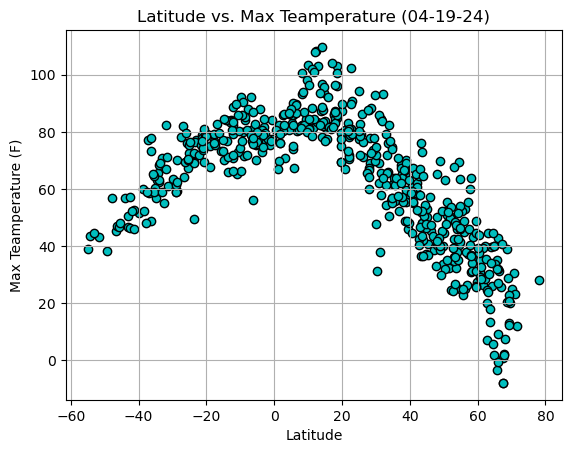

In [27]:
# Build scatter plot for latitude vs. temperature
date = city_data_df['Date'].max()
latitude = city_data_df['Lat']
y_vals = city_data_df['Max Temp']
plt.scatter(latitude, y_vals, marker="o", color="c", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Max Teamperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Teamperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

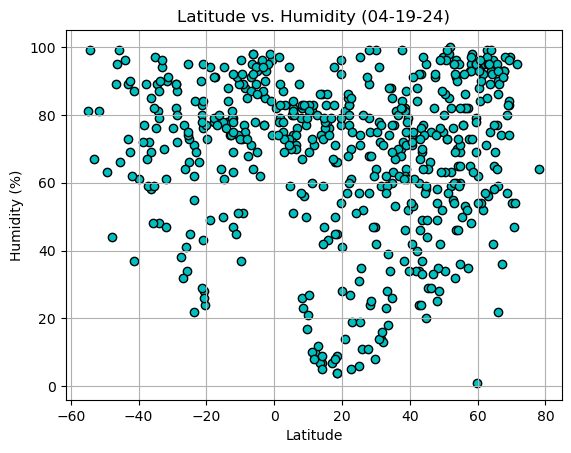

In [28]:
# Build scatter plot for latitude vs. temperature
y_vals = city_data_df['Humidity']
plt.scatter(latitude, y_vals, marker="o", color="c", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

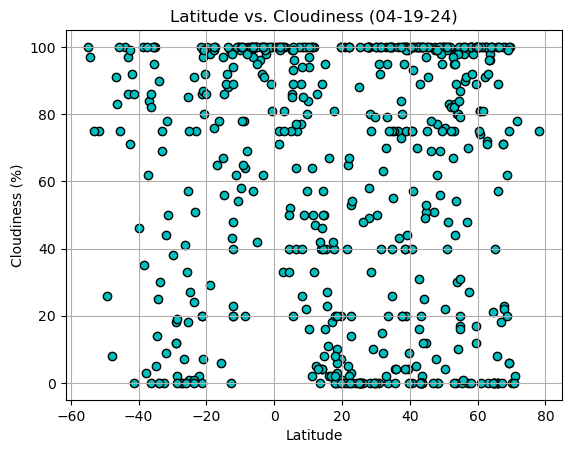

In [29]:
# Build scatter plot for latitude vs. temperature
y_vals = city_data_df['Cloudiness']
plt.scatter(latitude, y_vals, marker="o", color="c", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

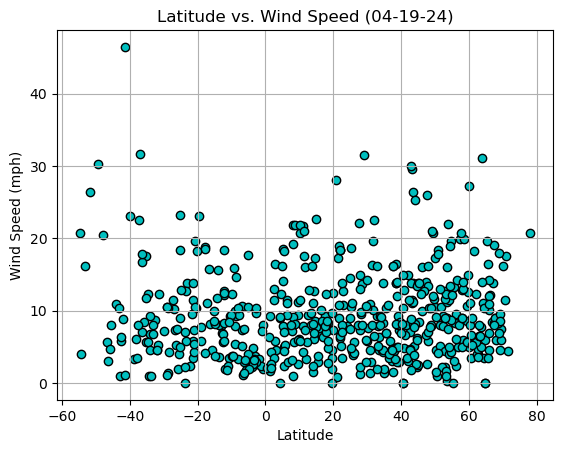

In [30]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
y_vals = city_data_df['Wind Speed']
plt.scatter(latitude, y_vals, marker="o", color="c", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker="o", color="skyblue", edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
    plt.xlabel('Latitude')
    print(f"The r-squared is: {rvalue**2}")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,13.50,75,98,7.72,CA,04-19-24
2,talnakh,69.4865,88.3972,20.21,97,100,7.49,RU,04-19-24
4,saudarkrokur,65.7461,-19.6394,35.06,77,100,16.49,IS,04-19-24
5,keflavik,64.0049,-22.5624,39.63,93,100,31.07,IS,04-19-24
7,ribeira grande,38.5167,-28.7000,66.78,82,40,13.80,PT,04-19-24


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.68,66,1,23.17,PN,04-19-24
3,grytviken,-54.2811,-36.5092,43.56,99,97,3.96,GS,04-19-24
6,waitangi,-43.9535,-176.5597,56.82,96,100,10.94,NZ,04-19-24
12,west island,-12.1568,96.8225,82.38,69,40,18.41,CC,04-19-24
15,avarua,-21.2078,-159.7750,78.85,83,20,3.44,CK,04-19-24


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7706342290652234


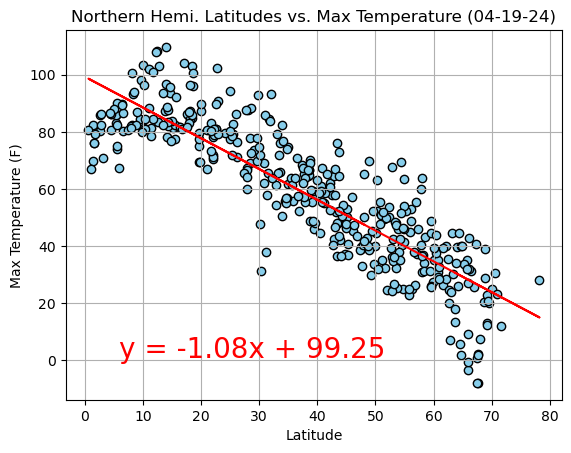

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

The r-squared is: 0.6299133950174378


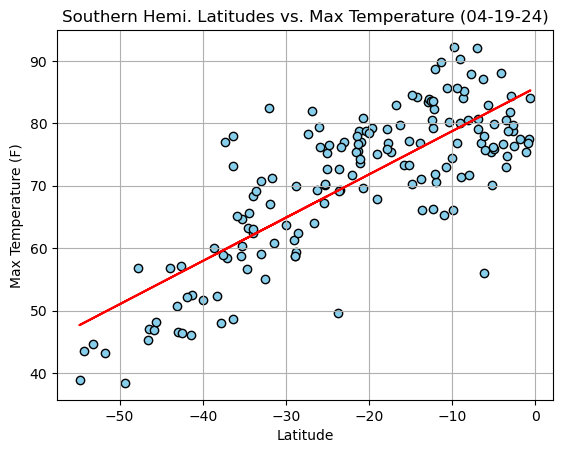

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03972697085491169


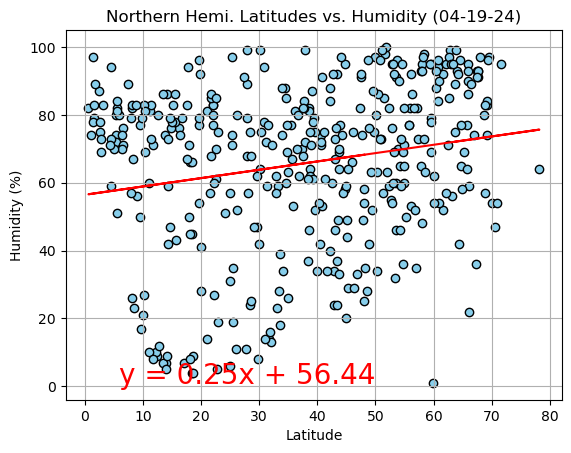

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

The r-squared is: 0.019696755321579117


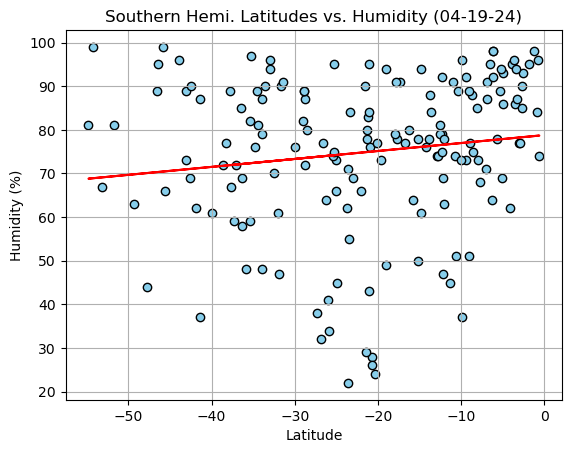

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005081399288544886


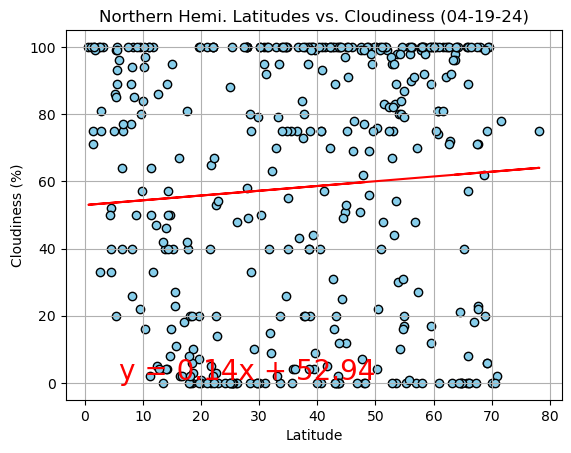

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

The r-squared is: 0.07528510937530437


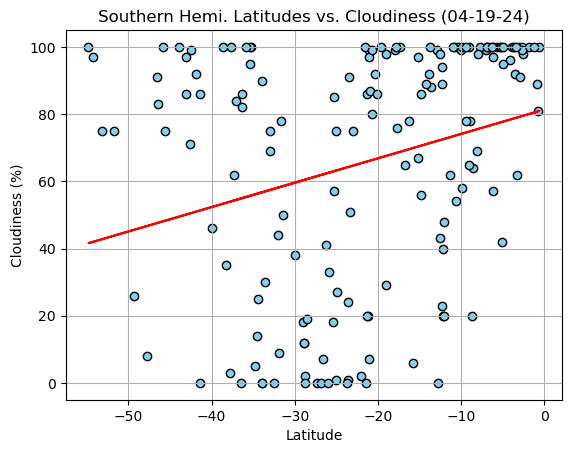

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0026311302403952113


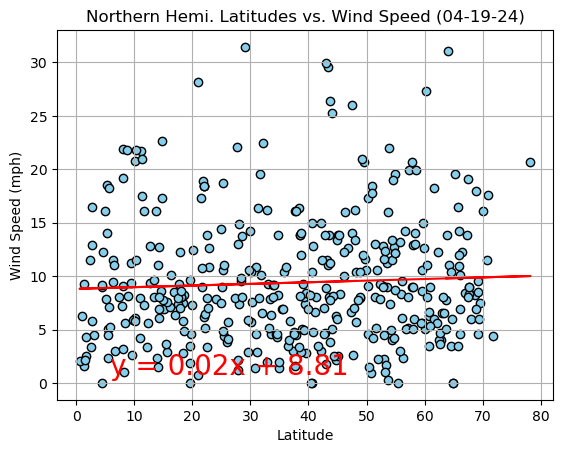

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)
plt.title(f"Northern Hemi. Latitudes vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

The r-squared is: 0.08795477849036192


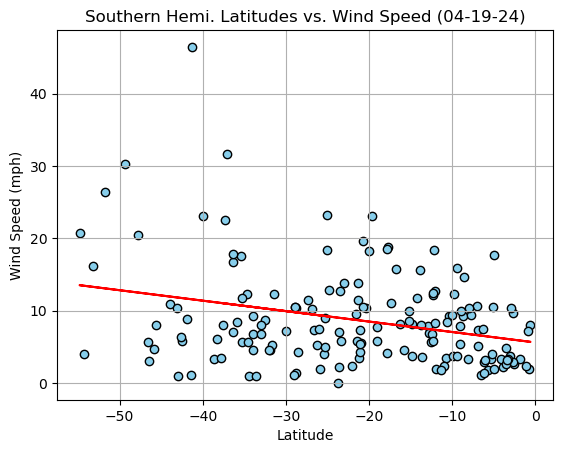

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)
plt.title(f"Southern Hemi. Latitudes vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE